In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2
%matplotlib inline

In [8]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import auc, roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
import random
from scipy.stats import sem, t
from scipy import mean

from SepMe.processing.batchprocessing import *

In [9]:
sepme_cols = ['as_0.02_ce', 'as_0.02_cp', 'as_0.02_ltcc', 'as_0.05_ce', 'as_0.05_cp',
       'as_0.05_ltcc', 'as_0.1_ce', 'as_0.1_cp', 'as_0.1_ltcc', 'as_0.5_ce',
       'as_0.5_cp', 'as_0.5_ltcc', 'bt_0.02_cp', 'bt_0.02_ltcc', 'bt_0.05_ce',
       'bt_0.05_cp', 'bt_0.05_ltcc', 'bt_0.1_ce', 'bt_0.1_cp', 'bt_0.1_ltcc',
       'bt_0.5_ce', 'bt_0.5_cp', 'bt_0.5_ltcc', 'cbsg_0.1_ce', 'cbsg_0.1_cp',
       'cbsg_0.1_ltcc', 'cbsg_0.2_ce', 'cbsg_0.2_cp', 'cbsg_0.2_ltcc',
       'cbsg_0.5_ce', 'cbsg_0.5_cp', 'cbsg_0.5_ltcc', 'cbsg_2.0_ce',
       'cbsg_2.0_cp', 'cbsg_2.0_ltcc', 'del_n/a_ce', 'del_n/a_cp',
       'del_n/a_ltcc', 'del_n/a_mv_false', 'del_n/a_mv_true', 'knn_1.0_ce',
       'knn_1.0_cp', 'knn_1.0_ltcc', 'knn_2.0_ce', 'knn_2.0_cp',
       'knn_2.0_ltcc', 'knn_4.0_ce', 'knn_4.0_cp', 'knn_4.0_ltcc',
       'knn_6.0_ce', 'knn_6.0_cp', 'knn_6.0_ltcc', 'knn_8.0_ce', 'knn_8.0_cp',
       'knn_8.0_ltcc']

,filename,type,phase,human_rating,idx,as_0.02_ce,as_0.02_cp,as_0.02_ltcc,as_0.05_ce,as_0.05_cp,...,A,class,human_bin,expert_bin,consensus,pm,pa,category,interval,interval_10
0,interleaved_100_200_10d_25_cramped_rotated_PCA,abstract,task,0.45,interleaved_100_200_10d_25_cramped_rotated_PCA_4,0.282524,0.562307,0.800000,0.282524,0.562307,...,1,4,no,no,yes,0.0,0.00,expert-class1,[0.4-0.6],[0.4-0.5]
1,interleaved_100_200_15d_0_notcramped_notrotate...,abstract,task,0.17,interleaved_100_200_15d_0_notcramped_notrotate...,0.325836,0.508557,0.861111,0.325836,0.508557,...,1,4,no,no,yes,0.0,0.00,expert-class1,[0-0.2],[0.1-0.2]
2,swanson_GlimmerMDS,semantic,task,0.07,swanson_GlimmerMDS_2,0.920365,0.255769,0.064777,0.920365,0.255769,...,1,2,no,no,yes,0.0,0.00,expert-class1,[0-0.2],[0.0-0.1]
3,swanson_GlimmerMDS,semantic,task,0.00,swanson_GlimmerMDS_2,0.920365,0.255769,0.064777,0.920365,0.255769,...,1,2,no,no,yes,0.0,0.00,expert-class1,[0-0.2],[0.0-0.1]
4,swanson_GlimmerMDS,semantic,task,0.12,swanson_GlimmerMDS_2,0.920365,0.255769,0.064777,0.920365,0.255769,...,1,2,no,no,yes,0.0,0.00,expert-class1,[0-0.2],[0.1-0.2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12317,interleaved_100_200_10d_25_cramped_rotated_tSNE,abstract,task,0.93,interleaved_100_200_10d_25_cramped_rotated_tSNE_2,0.073600,0.924391,1.000000,0.073600,0.924391,...,5,2,yes,yes,yes,1.0,1.00,expert-class5,[0.8-1.0],[0.0-0.1]
12318,fisheries_clusteredByEscapementTarget_RobPCA,abstract,task,0.67,fisheries_clusteredByEscapementTarget_RobPCA_4,0.505247,0.240741,0.888889,0.505247,0.240741,...,4,4,yes,yes,yes,1.0,0.75,expert-class5,[0.6-0.8],[0.6000000000000001-0.7000000000000001]
12319,interleaved_100_200_10d_25_cramped_rotated_tSNE,semantic,task,0.68,interleaved_100_200_10d_25_cramped_rotated_tSNE_2,0.073600,0.924391,1.000000,0.073600,0.924391,...,5,2,yes,yes,yes,1.0,1.00,expert-class5,[0.6-0.8],[0.6000000000000001-0.7000000000000001]
12320,interleaved_100_200_10d_25_cramped_rotated_tSNE,abstract,task,0.84,interleaved_100_200_10d_25_cramped_rotated_tSNE_2,0.073600,0.924391,1.000000,0.073600,0.924391,...,5,2,yes,yes,yes,1.0,1.00,expert-class5,[0.8-1.0],[0.8-0.9]


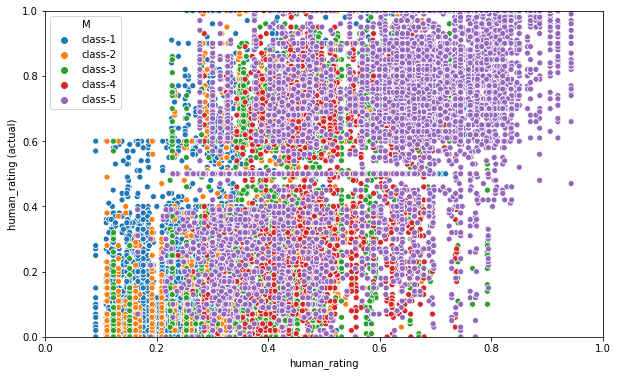

In [10]:
preds = pd.read_csv('train_preds_custom.csv')
preds['M'] = 'class-' +preds['M'].astype(str) 
preds = preds.sort_values(['M'])
preds.columns

f, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="human_rating", y="human_rating (actual)",
                 hue="M",  data=preds)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

df = pd.read_csv('../df.csv')
df.head()
df['pm'] = minmax_scale(df['M'])
df['pa'] = minmax_scale(df['A'])

df['category'] = 'expert-class' +df['M'].astype(str) 


df_clean = pd.read_csv('../df_clean.csv')
df_clean['pm'] = minmax_scale(df_clean['M'])
df_clean['pa'] = minmax_scale(df_clean['A'])

df_clean['category'] = 'expert-class' +df_clean['M'].astype(str) 

df_clean=df_clean.drop(['1v1','pass'], axis=1)

df_clean

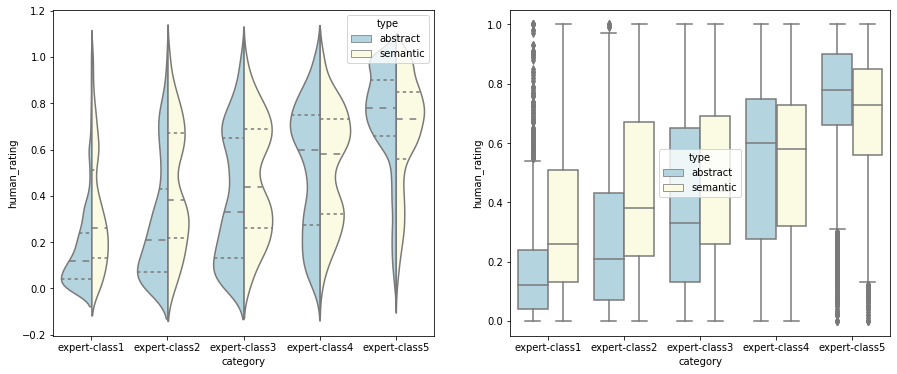

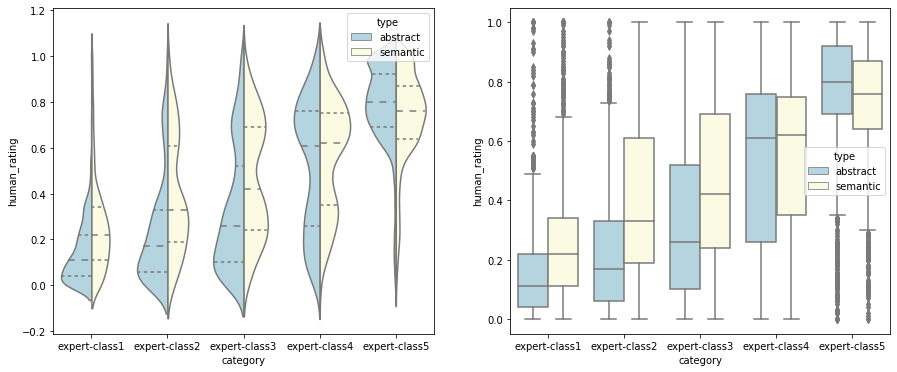

In [11]:

def plot_violins(df, ax, x = 'category', y = "human_rating", hue="type"):

    df = df.sort_values([x])


    sns.violinplot(x=x, y=y, hue=hue,
                   split=True, inner="quart",
                   palette={"semantic": "lightyellow", "abstract": "lightblue"},
                   data=df, ax=ax[0])
    
    sns.boxplot(x=x, y=y, hue=hue, palette=["lightblue", "lightyellow"],
            data=df, ax=ax[1])


f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df,ax)

f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df_clean,ax)

(712, 72)
(712, 74)


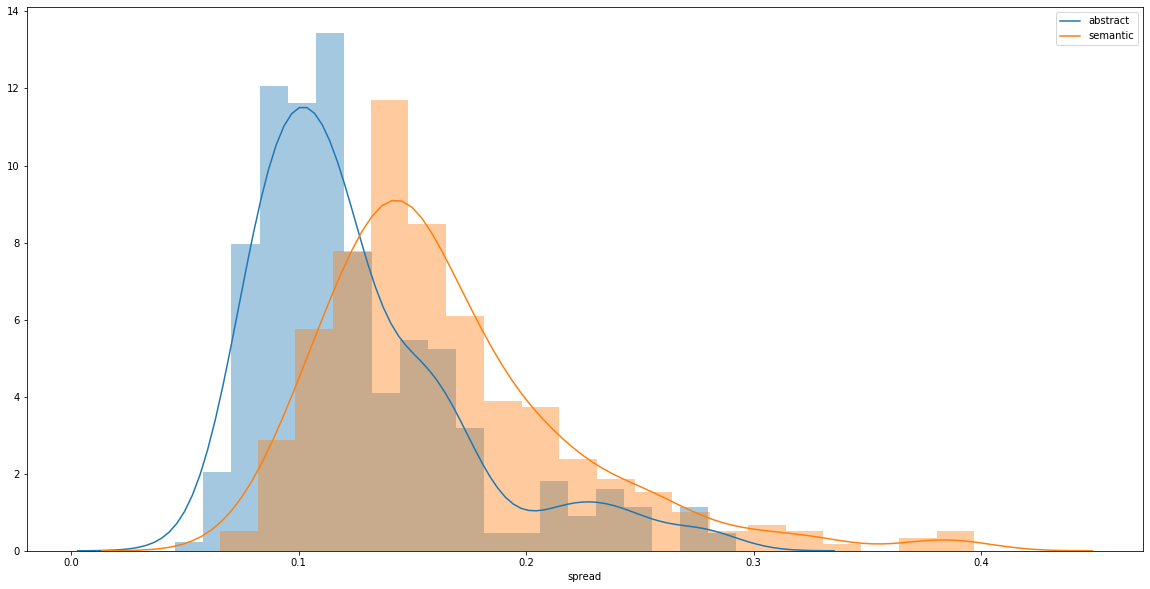

In [23]:
def aggregate(df, intervals = [0,.2,.6,.8,1.00], col_name = 'interval_4'):
    
    df_agg = (df.groupby(['filename','type','class'])
         .agg({'human_rating':['mean', 'count', sem], 
               'M':'first', 'A':'first'})).sort_values(['filename','type','class'])
    


    try:
        df_agg.columns = ["%s%s" % (a, ".%s" % b if b else "") for a, b in df_agg.columns]
        col = 'human_rating.sem'
    except Exception:
        print('meh')
        
    df_agg1 = (df.groupby(['filename','type','class']).mean()).sort_values(
                        ['filename','type','class'])
    
    
    df_agg = pd.concat([df_agg,df_agg1], axis=1)
    
    df_agg = df_agg.sort_values(['filename','type','class'])

    df_agg = df_agg.reset_index()
    
    confidence =.95
    h = df_agg['human_rating.sem'] * t.ppf((1 + confidence) / 2, df_agg['human_rating.count'] - 1)

    df_agg['start'] = df_agg['human_rating.mean']-h
    df_agg['end'] = df_agg['human_rating.mean']+h
    df_agg['spread'] = df_agg['end'] - df_agg['start']
    
    df_agg[col_name] = '[{},{}]'.format(intervals[0], intervals[1])
    
    for i, ints in enumerate(intervals):
        if i!=len(intervals)-1:

            df_agg.loc[df_agg['human_rating.mean'].between(intervals[i], intervals[i+1]), 
                       col_name] = '[{},{}]'.format(intervals[i], intervals[i+1])
 

    

    return df_agg



df_agg = aggregate(df_clean, col_name = 'interval_5', intervals = [0,.2,.4,.6,.8,1.00],)
df_agg1 = aggregate(df_clean, col_name = 'interval_10', intervals = list(np.round(np.arange(0,1,.1),2)))
df_agg2 = aggregate(df_clean, col_name = 'interval_20', intervals = list(np.round(np.arange(0,1,.005),2)))
print(df_agg.shape)
                    
df_agg = pd.concat([df_agg, df_agg1[['interval_10']], df_agg2[['interval_20']]], axis=1)
print(df_agg.shape)
                   
df_agg.to_csv('df_agg_class_intervals.csv', index=False)

df1,df2 = get_dfs(df_agg)
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(df1.spread, bins=20, kde_kws={"label": "abstract"})
sns.distplot(df2.spread, bins=20, kde_kws={"label": "semantic"})


,filename,type,class,human_rating.mean,human_rating.count,human_rating.sem,M.first,A.first,1v1,human_rating,...,A,pm,pa,regr_labels_10,regr_labels_20,regr_labels,start,end,spread,interval
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,1,0.812000,20,0.020437,5,5,False,0.812000,...,5.0,1.00,1.0,7.150000,14.850000,3.650000,0.769224,0.854776,0.085552,"[0.8,0.9]"
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,2,0.822105,19,0.020867,5,5,False,0.822105,...,5.0,1.00,1.0,6.315789,13.842105,3.684211,0.778266,0.865945,0.087679,"[0.8,0.9]"
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,1,0.818667,15,0.030766,5,5,False,0.818667,...,5.0,1.00,1.0,5.800000,14.533333,3.600000,0.752680,0.884653,0.131973,"[0.8,0.9]"
3,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,2,0.766667,15,0.028961,5,5,False,0.766667,...,5.0,1.00,1.0,6.600000,15.000000,3.400000,0.704552,0.828781,0.124230,"[0.7,0.8]"
4,JavierGeneratedData_3dinterleaved_4classes_PCA,abstract,1,0.782222,18,0.026191,4,5,False,0.782222,...,5.0,0.75,1.0,6.333333,14.166667,3.388889,0.726963,0.837481,0.110518,"[0.7,0.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,yeast_PCA,abstract,4,0.148333,30,0.021091,1,1,False,0.148333,...,1.0,0.00,0.0,1.100000,2.533333,0.400000,0.105197,0.191470,0.086273,"[0.1,0.2]"
708,yeast_PCA,semantic,1,0.725556,9,0.030737,1,1,False,0.725556,...,1.0,0.00,0.0,6.777778,14.111111,3.111111,0.654676,0.796435,0.141759,"[0.7,0.8]"
709,yeast_PCA,semantic,2,0.436250,16,0.056198,1,1,False,0.436250,...,1.0,0.00,0.0,4.000000,8.250000,1.812500,0.316467,0.556033,0.239567,"[0.4,0.5]"
710,yeast_PCA,semantic,3,0.481250,16,0.093139,1,1,False,0.481250,...,1.0,0.00,0.0,2.437500,6.625000,1.875000,0.282729,0.679771,0.397043,"[0.4,0.5]"


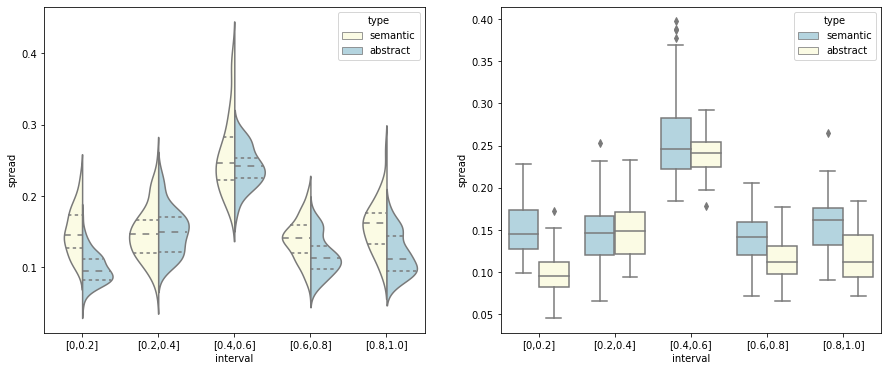

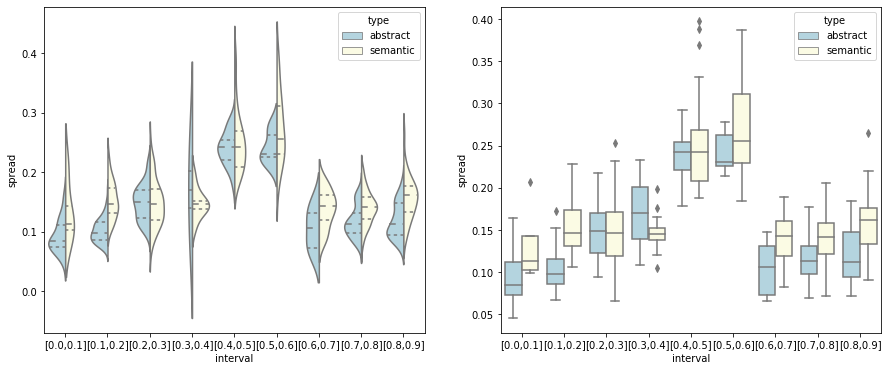

In [13]:
df = pd.read_csv('../df_clean_regr.csv')


f, ax = plt.subplots(1,2, figsize=(15, 6))
df_agg = aggregate(df,intervals = [0,.2,.4,.6,.8,1.00])
plot_violins(df_agg,ax,x='interval', y='spread', hue='type')

f, ax = plt.subplots(1,2, figsize=(15, 6))
df_agg = aggregate(df,intervals = list(np.round(np.arange(0,1,.1),2)))
plot_violins(df_agg,ax,x='interval', y='spread', hue='type')


df_agg

In [14]:
os.getcwd()

'/home/morarica/Developer/SepMe/Jupyters/ml'

In [15]:
df_agg

,filename,type,class,human_rating.mean,human_rating.count,human_rating.sem,M.first,A.first,1v1,human_rating,...,A,pm,pa,regr_labels_10,regr_labels_20,regr_labels,start,end,spread,interval
0,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,1,0.812000,20,0.020437,5,5,False,0.812000,...,5.0,1.00,1.0,7.150000,14.850000,3.650000,0.769224,0.854776,0.085552,"[0.8,0.9]"
1,JavierGeneratedData_3dinterleaved_3classes_Gli...,abstract,2,0.822105,19,0.020867,5,5,False,0.822105,...,5.0,1.00,1.0,6.315789,13.842105,3.684211,0.778266,0.865945,0.087679,"[0.8,0.9]"
2,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,1,0.818667,15,0.030766,5,5,False,0.818667,...,5.0,1.00,1.0,5.800000,14.533333,3.600000,0.752680,0.884653,0.131973,"[0.8,0.9]"
3,JavierGeneratedData_3dinterleaved_3classes_Gli...,semantic,2,0.766667,15,0.028961,5,5,False,0.766667,...,5.0,1.00,1.0,6.600000,15.000000,3.400000,0.704552,0.828781,0.124230,"[0.7,0.8]"
4,JavierGeneratedData_3dinterleaved_4classes_PCA,abstract,1,0.782222,18,0.026191,4,5,False,0.782222,...,5.0,0.75,1.0,6.333333,14.166667,3.388889,0.726963,0.837481,0.110518,"[0.7,0.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,yeast_PCA,abstract,4,0.148333,30,0.021091,1,1,False,0.148333,...,1.0,0.00,0.0,1.100000,2.533333,0.400000,0.105197,0.191470,0.086273,"[0.1,0.2]"
708,yeast_PCA,semantic,1,0.725556,9,0.030737,1,1,False,0.725556,...,1.0,0.00,0.0,6.777778,14.111111,3.111111,0.654676,0.796435,0.141759,"[0.7,0.8]"
709,yeast_PCA,semantic,2,0.436250,16,0.056198,1,1,False,0.436250,...,1.0,0.00,0.0,4.000000,8.250000,1.812500,0.316467,0.556033,0.239567,"[0.4,0.5]"
710,yeast_PCA,semantic,3,0.481250,16,0.093139,1,1,False,0.481250,...,1.0,0.00,0.0,2.437500,6.625000,1.875000,0.282729,0.679771,0.397043,"[0.4,0.5]"


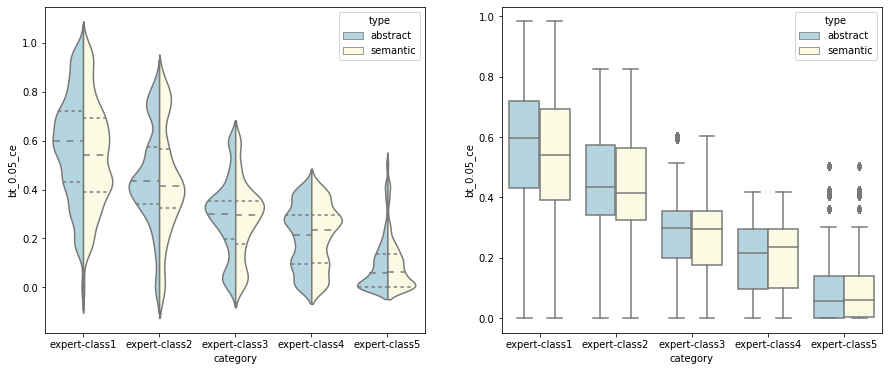

In [20]:
f, ax = plt.subplots(1,2, figsize=(15, 6))
plot_violins(df_clean, ax, x = 'category', y = "bt_0.05_ce", hue="type")